In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:

calendar_path = os.path.join(os.getcwd(), 'data', 'calendar.csv')
trainDF_path = os.path.join(os.getcwd(), 'data', 'sales_train_validation.csv')
pricesDF_path = os.path.join(os.getcwd(), 'data', 'sell_prices.csv')

df = pd.read_csv(trainDF_path)
calendarDF = pd.read_csv(calendar_path)
# pricesDF = pd.read_csv(pricesDF_path)

In [4]:
df = df[(df['store_id']=='CA_3') & (df['dept_id']=='FOODS_3')]

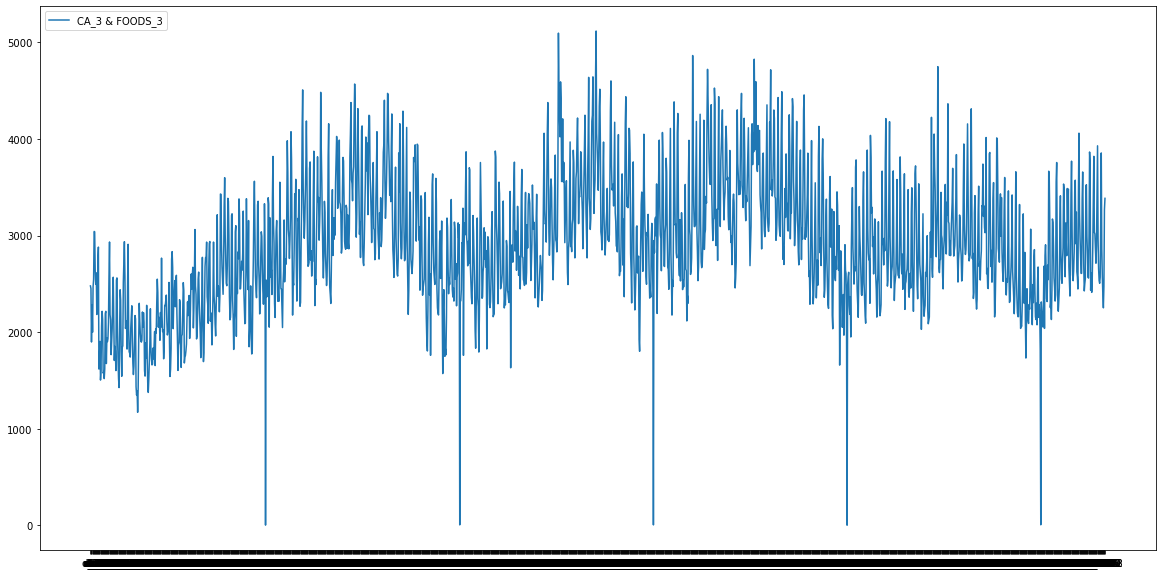

In [5]:
chartData = df.iloc[:,6:].sum()
labels = ['CA_3 & FOODS_3']

plt.figure(figsize=(20,10))
plt.plot(chartData)
plt.legend(labels, loc='upper left')
plt.show()

(0.07041168980027757, 0.002059823253176878)


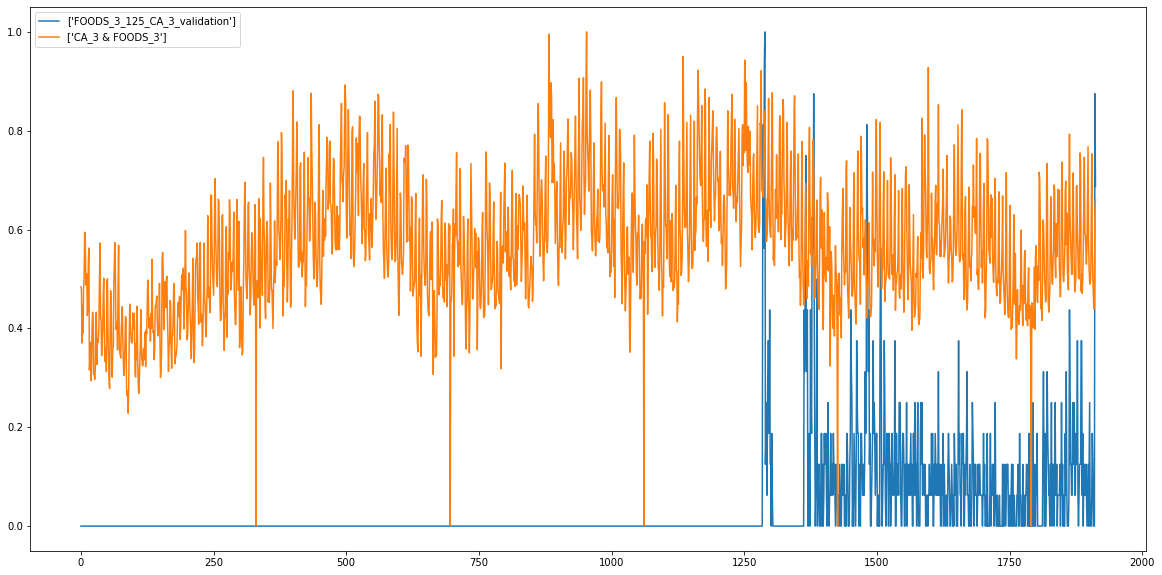

In [6]:
from scipy.stats.stats import pearsonr

itemNum = 123
sales1 = df.iloc[itemNum,6:]

# dfNorm = df.iloc[:,6:].div(df.sum(axis=1), axis=0)

# sales2 = dfNorm.sum()
# sales2 = dfNorm.mean()
sales2 = df.iloc[:,6:].sum()
sales2 = (sales2-sales2.min())/(sales2.max()-sales2.min())

sales1 = np.array((sales1-sales1.min())/(sales1.max()-sales1.min()))
sales2 = np.array(sales2)
print(pearsonr(sales1, sales2))

#--------------------------------

# chartData = df.iloc[itemNum,6:]
label1 = [df.iloc[itemNum,0]]
label2 = ['CA_3 & FOODS_3']

plt.figure(figsize=(20,10))
plt.plot(sales1, label = label1)
plt.plot(sales2, label = label2)
plt.legend(loc='upper left')
plt.show()


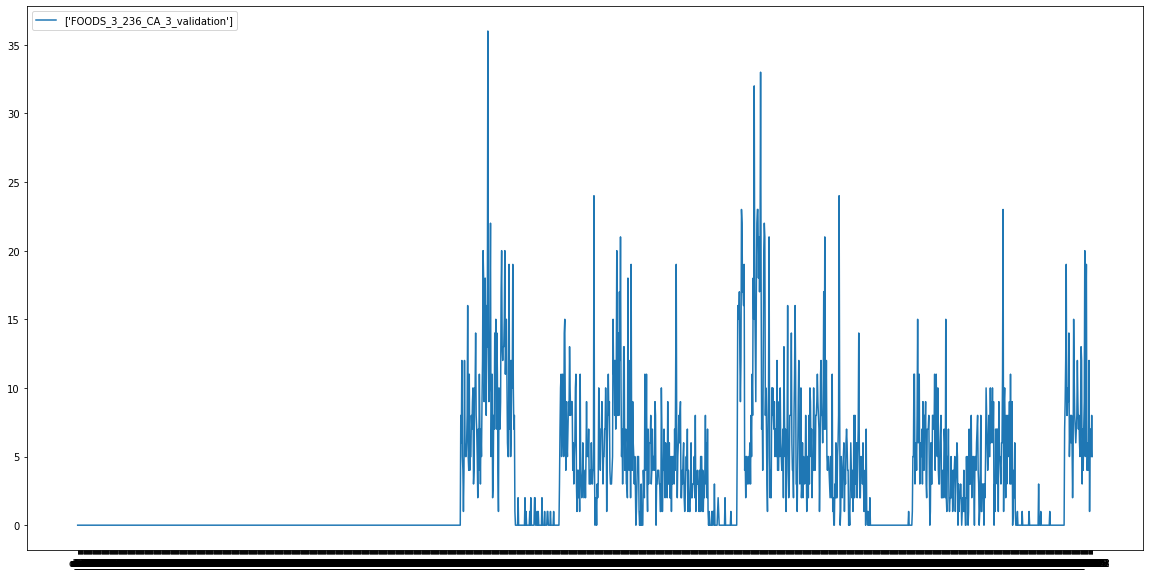

In [7]:
itemNum = 234
sales1 = df.iloc[itemNum,6:]
# sales1 = df.iloc[itemNum,1250:]

label1 = [df.iloc[itemNum,0]]

plt.figure(figsize=(20,10))
plt.plot(sales1, label = label1)
plt.legend(loc='upper left')
plt.show()

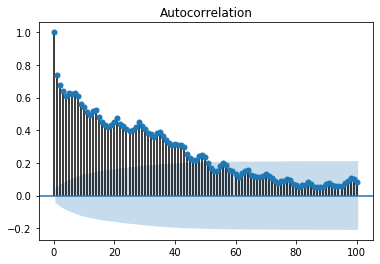

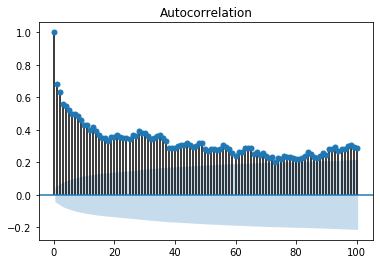

In [8]:
import statsmodels.api as sm

itemNum = 234
sm.graphics.tsa.plot_acf(df.iloc[itemNum,6:], lags=100)
plt.show()

itemNum = 432
sm.graphics.tsa.plot_acf(df.iloc[itemNum,6:], lags=100)
plt.show()

In [9]:
# prepare X data 
xDF = pd.get_dummies(calendarDF.fillna(0), columns=['event_name_1', 'event_name_2', 'wday','month'])
# xDF = pd.get_dummies(calendarDF.fillna(0), columns=['event_name_1', 'event_name_2', 'wday'])

xDF['event_name_1_Easter'] = xDF['event_name_1_Easter'] + xDF['event_name_2_Easter']
xDF['event_name_1_Cinco De Mayo'] = xDF['event_name_1_Cinco De Mayo'] + xDF['event_name_2_Cinco De Mayo']
xDF['event_name_1_OrthodoxEaster'] = xDF['event_name_1_OrthodoxEaster'] + xDF['event_name_2_OrthodoxEaster']
xDF["event_name_1_Father's day"] = xDF["event_name_1_Father's day"] + xDF["event_name_2_Father's day"]

columnList = ['event_name_1_Chanukah End', 'event_name_1_Christmas',
       'event_name_1_Cinco De Mayo', 'event_name_1_ColumbusDay',
       'event_name_1_Easter', 'event_name_1_Eid al-Fitr',
       'event_name_1_EidAlAdha', "event_name_1_Father's day",
       'event_name_1_Halloween', 'event_name_1_IndependenceDay',
       'event_name_1_LaborDay', 'event_name_1_LentStart',
       'event_name_1_LentWeek2', 'event_name_1_MartinLutherKingDay',
       'event_name_1_MemorialDay', "event_name_1_Mother's day",
       'event_name_1_NBAFinalsEnd', 'event_name_1_NBAFinalsStart',
       'event_name_1_NewYear', 'event_name_1_OrthodoxChristmas',
       'event_name_1_OrthodoxEaster', 'event_name_1_Pesach End',
       'event_name_1_PresidentsDay', 'event_name_1_Purim End',
       'event_name_1_Ramadan starts', 'event_name_1_StPatricksDay',
       'event_name_1_SuperBowl', 'event_name_1_Thanksgiving',
       'event_name_1_ValentinesDay', 'event_name_1_VeteransDay', 
       'wday_1', 'wday_2', 'wday_3', 'wday_4', 'wday_5', 'wday_6', 'wday_7',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']

xDF = xDF[columnList]

dayNum = pd.DataFrame(np.arange(0,len(xDF)),columns=['dayNum'])

xDF['dayNum'] = dayNum




In [10]:
# using d_1 -> d_1883 for training
# d_1884 -> d1913 for test

yDF = df.iloc[:,6:].sum()

# normalize y values
yDF = np.array((yDF-yDF.min())/(yDF.max()-yDF.min())).reshape(-1, 1)

# train/test split
yTrain = yDF[:1883,:]
yTest = yDF[1883:1913,:]

xTrain = xDF.loc[:1882,:]
xTest = xDF.iloc[1883:1913]

# modeling trend
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()  
regressor.fit(xTrain, yTrain)
print(regressor.intercept_)
print(regressor.coef_)



[-4.66187642e+08]
[[-1.32618844e-02 -5.06557904e-01  3.54296410e-02  4.39606219e-02
  -7.33338536e-02  1.17469695e-03  4.16018116e-03 -8.26146974e-02
  -1.22945881e-01  9.01194223e-02  1.50358384e-01  6.90855425e-03
  -2.28201193e-02  1.65155893e-02  6.42108967e-03 -5.00802311e-02
  -3.48957950e-02 -1.20536827e-03 -1.40873705e-01  4.07790168e-02
  -2.31144596e-03 -3.58669982e-02  5.10517226e-02  2.33647284e-02
   2.03437332e-02 -6.78790173e-03  5.18805447e-02 -6.68916558e-02
  -9.21387990e-02  5.31563307e-02  2.64215883e+08  2.64215883e+08
   2.64215883e+08  2.64215883e+08  2.64215883e+08  2.64215883e+08
   2.64215883e+08  2.01971759e+08  2.01971759e+08  2.01971759e+08
   2.01971759e+08  2.01971759e+08  2.01971759e+08  2.01971759e+08
   2.01971759e+08  2.01971759e+08  2.01971759e+08  2.01971759e+08
   2.01971759e+08  5.98386949e-05]]


In [11]:
# plot residuals

trendResid = yTrain - regressor.predict(xTrain)

labels = ['CA_3 & FOODS_3 residuals after trend']

plt.figure(figsize=(20,10))
plt.plot(xTrain['dayNum'], trendResid)
plt.legend(labels, loc='upper left')
plt.show()


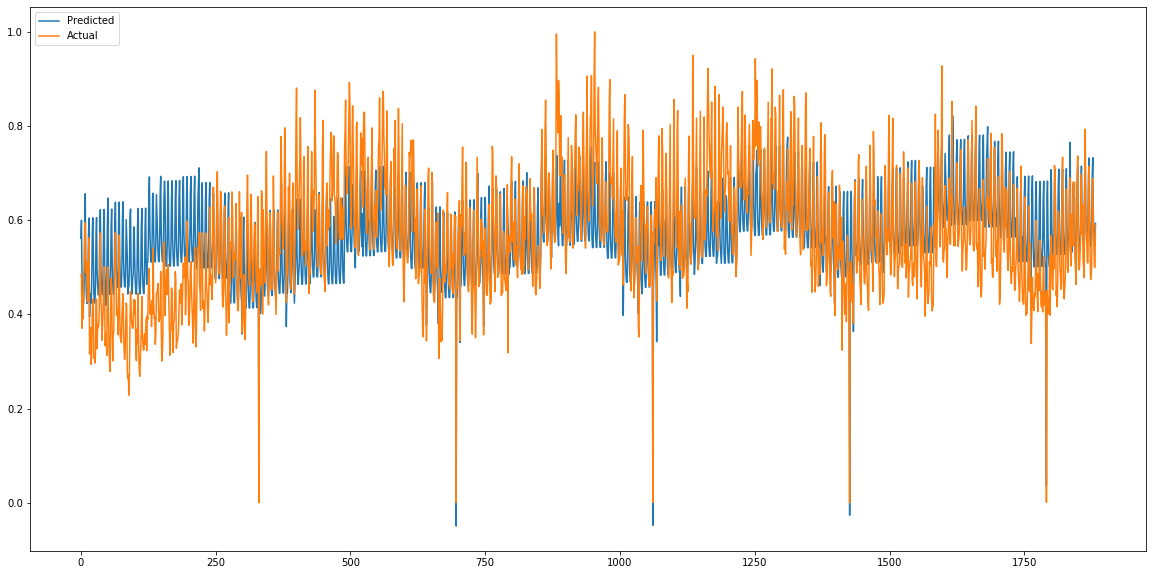

In [12]:
yPred = regressor.predict(xTrain)

labels = ['CA_3 & FOODS_3 training predicted vs actual']

plt.figure(figsize=(20,10))
plt.plot(xTrain['dayNum'], yPred, label="Predicted")
plt.plot(xTrain['dayNum'], yTrain, label="Actual")
plt.legend(loc='upper left')
plt.show()

Mean Absolute Error: 0.06370766753716846
Mean Squared Error: 0.0053732783463704146
Root Mean Squared Error: 0.07330264897239673


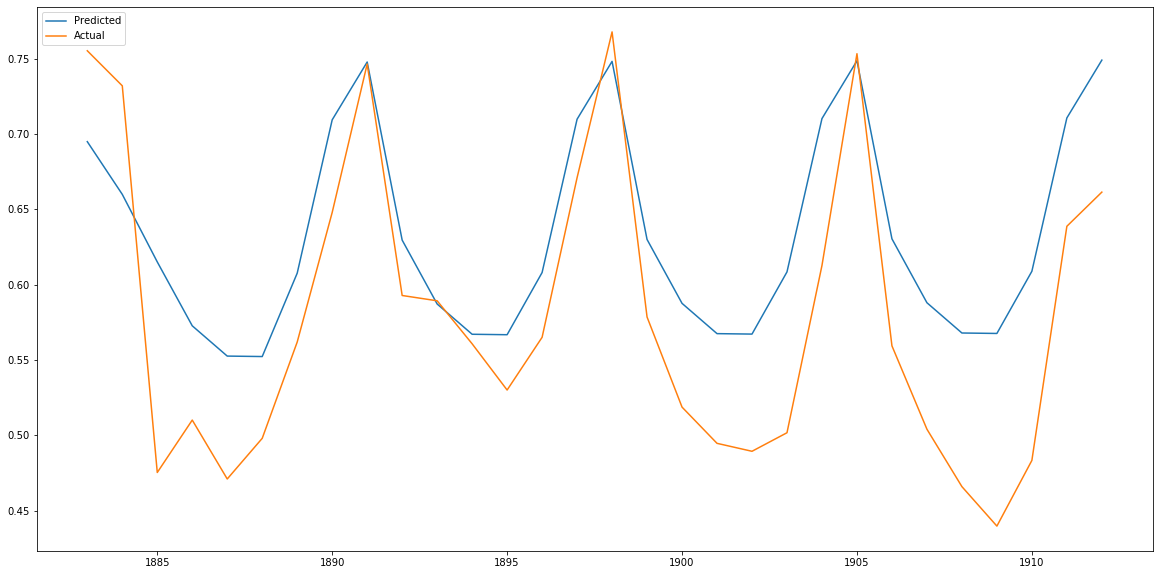

In [13]:
# check test values 

yPred = regressor.predict(xTest)

print('Mean Absolute Error:', metrics.mean_absolute_error(yTest, yPred))  
print('Mean Squared Error:', metrics.mean_squared_error(yTest, yPred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, yPred)))

labels = ['CA_3 & FOODS_3 validation range']

plt.figure(figsize=(20,10))
plt.plot(xTest['dayNum'], yPred, label="Predicted")
plt.plot(xTest['dayNum'], yTest, label="Actual")
plt.legend(loc='upper left')
plt.show()



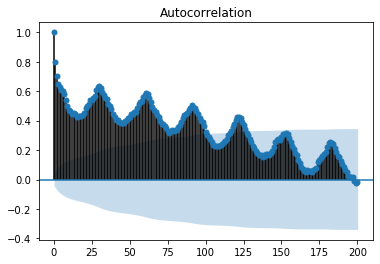

In [14]:
# there's still monthly seasonality here, even with dummy variables for the month.

# applying a sinusoidal regression won't fix it. because months aren't the same # of days. 

sm.graphics.tsa.plot_acf(trendResid, lags=200)
plt.show()

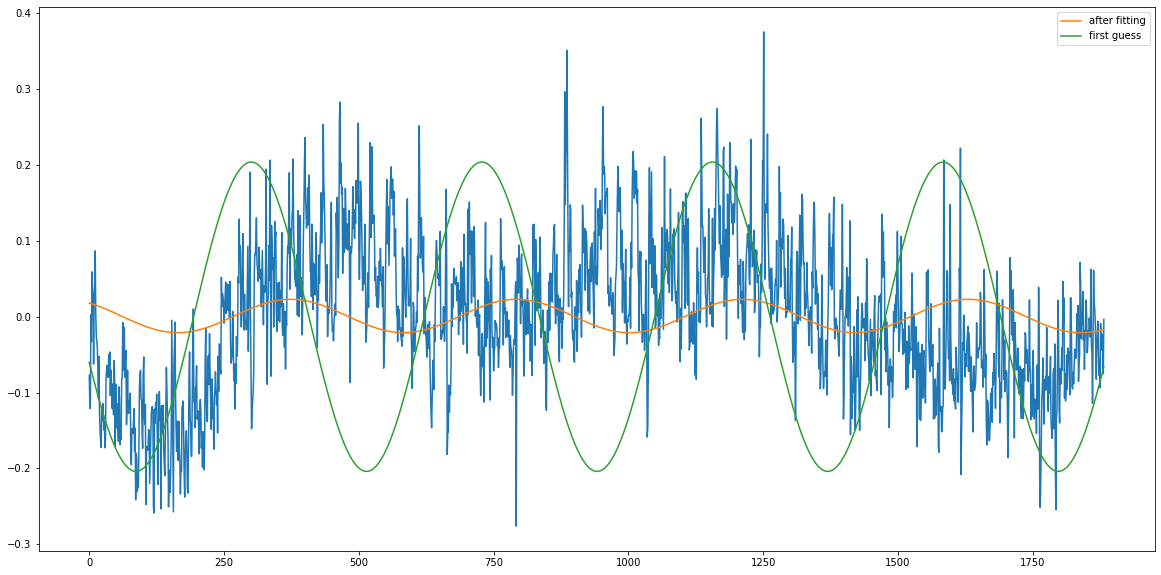

In [15]:
from scipy.optimize import curve_fit

N = 1883
t = np.linspace(0, 4*np.pi, N)
data = trendResid.squeeze()

guess_freq = 2.2
guess_amplitude = 3*np.std(data)/(2**0.5)
guess_phase = np.pi+.3
guess_offset = np.mean(data)

p0=[guess_freq, guess_amplitude,
    guess_phase, guess_offset]

def my_sin(x, freq, amplitude, phase, offset):
    return np.sin(x * freq + phase) * amplitude + offset

fit = curve_fit(my_sin, t, data, p0=p0)

data_first_guess = my_sin(t, *p0)

data_fit = my_sin(t, *fit[0])

plt.figure(figsize=(20,10))
plt.plot(data)
plt.plot(data_fit, label='after fitting')
plt.plot(data_first_guess, label='first guess')
plt.legend()
plt.show()

In [22]:
# unpack normalized data into each item

# d_1884 -> d1913 for test
columnList = ['id']

for i in range(1884, 1914):
    dayNum = 'd_' + str(i)
    columnList.append(dayNum)

yDF = pd.DataFrame(columns=columnList)

for i in range(0,int(len(df))):
    # # take max
    # row = yPred * (df.iloc[i,6:].max()-df.iloc[i,6:].min()) + df.iloc[i,6:].min()

    # # 90% quantile
    row = yPred * (df.iloc[i,6:].quantile(q = 0.9)-df.iloc[i,6:].min()) + df.iloc[i,6:].min()

    row = row.round()
    temp = pd.DataFrame(row).transpose()
    temp.insert(0, 'id', df.iloc[i,0])
    new_cols = {x: y for x, y in zip(temp.columns, yDF.columns)}
    yDF = yDF.append(temp.rename(columns=new_cols))



In [20]:
yDF

id  d_1884  d_1885  d_1886  d_1887  d_1888  \
0   FOODS_3_001_CA_3_validation     2.0     2.0     2.0     2.0     2.0   
0   FOODS_3_002_CA_3_validation     3.0     3.0     2.0     2.0     2.0   
0   FOODS_3_003_CA_3_validation     1.0     1.0     1.0     1.0     1.0   
0   FOODS_3_004_CA_3_validation     1.0     1.0     1.0     1.0     1.0   
0   FOODS_3_005_CA_3_validation     2.0     2.0     2.0     2.0     2.0   
..                          ...     ...     ...     ...     ...     ...   
0   FOODS_3_823_CA_3_validation     6.0     5.0     5.0     5.0     4.0   
0   FOODS_3_824_CA_3_validation     1.0     1.0     1.0     1.0     1.0   
0   FOODS_3_825_CA_3_validation     2.0     2.0     2.0     2.0     2.0   
0   FOODS_3_826_CA_3_validation     1.0     1.0     1.0     1.0     1.0   
0   FOODS_3_827_CA_3_validation     3.0     3.0     3.0     3.0     3.0   

    d_1889  d_1890  d_1891  d_1892  ...  d_1904  d_1905  d_1906  d_1907  \
0      2.0     2.0     2.0     2.0  ...     2.0     2.0     2.0     2.0   
0      2.0     2.0     3.0     3.0  ...     2.0     3.0     3.0     3.0   
0      1.0     1.0     1.0     1.0  ...     1.0     1.0     1.0     1.0   
0      1.0     1.0     1.0     1.0  ...     1.0     1.0     1.0     1.0   
0      2.0     2.0     2.0     2.0  ...     2.0     2.0     2.0     2.0   
..     ...     ...     ...     ...  ...     ...     ...     ...     ...   
0      4.0     5.0     6.0     6.0  ...     5.0     6.0     6.0     5.0   
0      1.0     1.0     1.0     1.0  ...     1.0     1.0     1.0     1.0   
0      2.0     2.0     2.0     2.0  ...     2.0     2.0     2.0     2.0   
0      1.0     1.0     1.0     1.0  ...     1.0     1.0     1.0     1.0   
0      3.0     3.0     4.0     4.0  ...     3.0     4.0     4.0     3.0   

    d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  
0      2.0     2.0     2.0     2.0     2.0     2.0  
0      2.0     2.0     2.0     2.0     3.0     3.0  
0      1.0     1.0     1.0     1.0     1.0     1.0  
0      1.0     1.0     1.0     1.0     1.0     1.0  
0      2.0     2.0     2.0     2.0     2.0     2.0  
..     ...     ...     ...     ...     ...     ...  
0      5.0     5.0     5.0     5.0     6.0     6.0  
0      1.0     1.0     1.0     1.0     1.0     1.0  
0      2.0     2.0     2.0     2.0     2.0     2.0  
0      1.0     1.0     1.0     1.0     1.0     1.0  
0      3.0     3.0     3.0     3.0     4.0     4.0  

[823 rows x 31 columns]

In [21]:
df[yDF.columns]


id  d_1884  d_1885  d_1886  d_1887  d_1888  \
8324  FOODS_3_001_CA_3_validation       2       1       0       6       2   
8325  FOODS_3_002_CA_3_validation       0       0       0       0       0   
8326  FOODS_3_003_CA_3_validation       0       0       1       0       1   
8327  FOODS_3_004_CA_3_validation       0       0       0       0       1   
8328  FOODS_3_005_CA_3_validation       0       0       0       0       0   
...                           ...     ...     ...     ...     ...     ...   
9142  FOODS_3_823_CA_3_validation       0       0       0       0       0   
9143  FOODS_3_824_CA_3_validation       0       0       0       0       1   
9144  FOODS_3_825_CA_3_validation       2       5       1       1       4   
9145  FOODS_3_826_CA_3_validation       1       5       1       0       4   
9146  FOODS_3_827_CA_3_validation       8       5       1       2       4   

      d_1889  d_1890  d_1891  d_1892  ...  d_1904  d_1905  d_1906  d_1907  \
8324       1       1       1       5  ...       2       0       6       2   
8325       0       0       0       0  ...       0       0       0       0   
8326       1       2       1       2  ...       1       1       3       1   
8327       0       1       0       1  ...       2       0       2       0   
8328       0       0       0       0  ...       0       0       0       0   
...      ...     ...     ...     ...  ...     ...     ...     ...     ...   
9142       0       0       0       0  ...       2       2       2       3   
9143       0       1       1       1  ...       0       3       1       0   
9144       3       3       4       3  ...       3       0       4       3   
9145       1       1       2       2  ...       5       2       2       0   
9146       4       7       1       5  ...       6       9       2       6   

      d_1908  d_1909  d_1910  d_1911  d_1912  d_1913  
8324       0       3       4       0       0       2  
8325       0       0       0       0       0       0  
8326       2       0       0       1       1       3  
8327       0       0       0       0       0       1  
8328       0       0       0       0       0       0  
...      ...     ...     ...     ...     ...     ...  
9142       3       2       3       4       1       0  
9143       1       0       4       1       0       1  
9144       3       0       0       3       3       6  
9145       1       1       3       0       1       3  
9146       9       3       1       3       3      13  

[823 rows x 31 columns]

In [18]:
# this sucks